In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Stain
data = pd.read_excel('NSF_Ti64_Mean stress.xlsx',sheet_name='Renishaw') #Renishaw and EOS
data

,Spec ID,Stress/strain ratio,f,s,εrange,εmax,εmin,Nf,2Nf
0,SP-A11,-1,2.000,0.005,0.010,0.005,-0.005,19042,38084
1,SP-A35,-1,2.000,0.005,0.010,0.005,-0.005,10955,21910
2,SP-A43,-1,2.500,0.004,0.008,0.004,-0.004,21564,43128
3,SP-A04,-1,2.500,0.004,0.008,0.004,-0.004,50151,100302
4,SP-A03,-1,5.000,0.002,0.004,0.002,-0.002,5000000,10000000
5,SP-A33,-1,3.333,0.003,0.006,0.003,-0.003,107889,215778
6,SP-A09,-1,3.333,0.003,0.006,0.003,-0.003,165211,330422
7,SP-A41,-1,5.000,0.002,0.004,0.002,-0.002,2317859,4635718
8,SP-A24,-1,3.333,0.003,0.006,0.003,-0.003,101499,202998
9,SP-A25,-1,5.000,0.002,0.004,0.002,-0.002,5000000,10000000


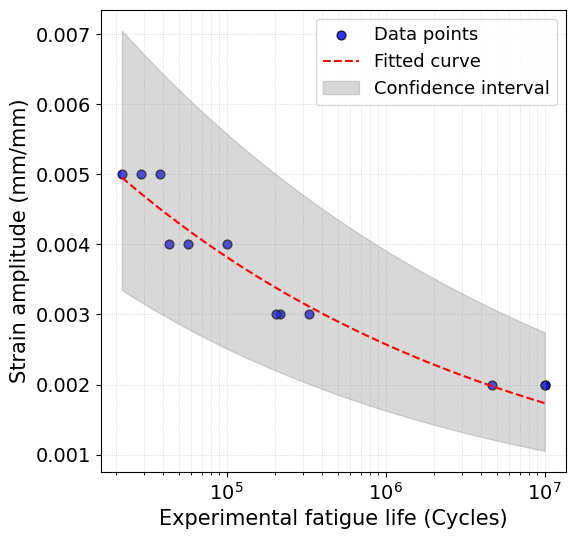

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Assuming data is already loaded into 'data'
strain_levels = data['s']
num_cycles = data['2Nf']

# Define a function to model the power-law relationship for the S-N curve
def power_law(x, a, b):
    return a * np.power(x, b)

# Fit the model to data
p_opt, p_cov = curve_fit(power_law, num_cycles, strain_levels)

# Extract the fit parameters and their standard errors
a_opt, b_opt = p_opt
perr = np.sqrt(np.diag(p_cov))  # Standard errors of the fit parameters

# Generate x values for the fit
x_fit = np.logspace(np.log10(min(num_cycles)), np.log10(max(num_cycles)), 1000)
y_fit = power_law(x_fit, a_opt, b_opt)

# Compute the error bounds (assuming symmetric confidence intervals)
y_upper = power_law(x_fit, a_opt + perr[0], b_opt + perr[1])
y_lower = power_law(x_fit, a_opt - perr[0], b_opt - perr[1])



# Create a figure for the plot
fig = plt.figure(figsize=(6, 6))

# Scatter plot for the S-N curve
plt.scatter(num_cycles, strain_levels, s=40, color='blue', alpha = 0.8, edgecolor='black', label='Data points')


# Plot the fitted line
plt.plot(x_fit, y_fit, 'r--', label='Fitted curve')

# Plot the error bounds
plt.fill_between(x_fit, y_lower, y_upper, color='gray', alpha=0.3, label='Confidence interval')


# Set axis labels
plt.ylabel('Strain amplitude (mm/mm)', fontsize=15)
plt.xlabel('Experimental fatigue life (Cycles)', fontsize=15)

# Set logarithmic scale for the x-axis
plt.xscale('log')

# Customize grid with more transparency
plt.grid(True, which='both', linestyle=':', linewidth=0.5, color='gray', alpha=0.4)  # Set grid transparency

# Customize tick labels
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)


# Add legend
plt.legend(loc='best', fontsize=13)

# Show the plot
plt.show()
